# Information Extraction (Tagging) for Clinical Notes using Deep Learning

## Objective:
* Extract information from unstructured text in clinical notes by classifying individual words into categories
    * CAD 
        * mention, event, test, symptom
    * Diabetes
        * mention, high A1c, high glucose
    * Obesity
        * mention, high BMI
    * Hyperlipidemia
        * mention, high cholesterol, high LDL
    * Hypertension
        * mention, high blood pressure
    * Medication
        * ACE inhibitor, amylin, anti-diabetes,
            ARB, aspirin, beta blocker, calcium
            channel blocker, diuretic, DPP4 inhibitors,
            ezetimibe, fibrate, GLP1 agonist, insulin,
            Meglitinide, metformin, niacin, nitrate,
            obesity medications, statin, sulfonylurea,
            thiazolidinedione, thienopyridine
    * Smoking
        * current, past, ever, never, unknown
    * Family History
        * present, not present
* Time attributes with respect to the document creation time (DCT)
    * before
    * during
    * after
    * na

In [1]:
from IPython.display import display, Markdown
from data_process import get_text_tags, get_labels, get_words_locations

######### for Markdown in Demo #########
def underline_and_tag(text, locations, labels):
    sl = []
    last = len(text)
    sl.append(0)
    lab = []
    for i, j in zip(locations, labels):
        if 'O' not in j:
            sl.append(i[0])
            sl.append(i[1])
            lab.append(j)
    sl.append(last)
    nl = []
    for i, _ in enumerate(sl):
        if i < len(sl) - 1:
            nl.append(slice(sl[i], sl[i+1]))
    frg = []
    for i in nl:
        frg.append(text[i])
    new_lab = []
    new_front = []
    new_lab.append('')
    new_front.append('')
    for i in lab:
        i = [j[2:] for j in i]
        new_lab.append('</u></b><sub font-size: small><mark style="background-color: lightblue">'+', '.join(i)+'</mark></sub>')
        new_front.append('<u><b>')
        new_lab.append('')
        new_front.append('')
    markdown = []
    for i , j, k in zip(new_front, frg, new_lab):
        markdown.append(i+j+k)
        
    show = ''.join(markdown).replace("\n", "<br>")
    return show

Using TensorFlow backend.


In [2]:
sample_file = '/host_home/data/i2b2/2014/training/training-RiskFactors-Complete-Set1/220-01.xml'
sample_text, sample_tags = get_text_tags(sample_file)    
sample_words, sample_locations = get_words_locations(sample_text)
sample_labels = get_labels(sample_tags, sample_locations)
display(Markdown(sample_text))




Record date: 2067-05-03

Narrative History

   55 yo woman who presents for f/u 

   

   Seen in Cardiac rehab locally last week and BP 170/80.  They called us and we increased her HCTZ to 25 mg from 12.5 mg.  States her BP's were fine there since - 130-140/70-80.

   

   

   Saw Dr Oakley 4/5/67 - she was happy with results of ETT at Clarkfield.  To f/u 7/67.  No CP's since last admit.

   

   Back to work and starting to walk.  No wt loss and discouraged by this, but just starting to exercise.

   

   No smoking for 3 months now!

   

   Still with hotflashes, wakes her up at night.

Problems

      FH breast cancer   37 yo s 



      FH myocardial infarction   mother died 66 yo 



      Hypertension



      Uterine fibroids   u/s 2062 



      Smoking



      hyperlipidemia   CRF mild chol, cigs, HTN, Fhx and known hx CAD in pt. 



      borderline diabetes mellitus   4/63 125 , follow hgbaic 



      VPB   2065 - ETT showed freq PVC 



      coronary artery disease   s/p ant SEMI + stent LAD 2/67, Dr Oakley 



      thyroid nodule   2065, hot, follow TSH. 

Medications

      NORVASC (AMLODIPINE)     5MG  1 Tablet(s) PO QD  



      PLAVIX (CLOPIDOGREL)   75 MG     PO QD  



      ATENOLOL     50MG  1 Tablet(s) PO QD  



      ASA (ACETYLSALICYLIC ACID)     325MG  1 Tablet(s) PO QD  



      ZESTRIL (LISINOPRIL)     40MG  1 Tablet(s) PO QD   



      LIPITOR (ATORVASTATIN)     10MG  1 Tablet(s) PO QD  



      HCTZ (HYDROCHLOROTHIAZIDE)     25MG  1 Tablet(s) PO QD   



      NITROGLYCERIN 1/150 (0.4 MG)   1 TAB     SL x1  PRN prn CP 

Allergies

      CECLOR (CEFACLOR)   Rash   

Vital Signs

      BLOOD PRESSURE-SITTING   150/70 

         repeat 145/80   HR 60 reg  WT  202 lbs

Physical Exam

   Looks well.  Lungs clear,  CVS  RRRs1s2, Ext - no edema	

Assessment and Plan

   1. H/M - Pe next appt in few months.  Overdue for mammo - will need to stress this.

   2.  CAD - cont with cardiac rehab, exercise, Dr Oakley, but doing well.

   3.  BP - better on increased HCTZ.  Check labs next visit, good K recently and on ACEI.

   4.  Cigs - great!

   5. Hot flashes - doesn't want to try any other meds - will try to put up with it.

   6. Hot thyroid nodule - recheck TSH next visit.

   7. Borderline glc - ok hgba1c 3/67.

   8.  Chol - ok, fasting on next visit.

   

   








<img src="tags.JPG" style=" width: 1000px" align="left" />

In [3]:
sample_show = underline_and_tag(sample_text, sample_locations, sample_labels)
display(Markdown(sample_show))

<br><br><br>Record date: 2067-05-03<br><br>Narrative History<br><br>   55 yo woman who presents for f/u <br><br>   <br><br>   Seen in Cardiac rehab locally last week and <u><b>BP</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.high_bp.before_DCT</mark></sub> <u><b>170/80</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.high_bp.before_DCT</mark></sub>.  They called us and we increased her <u><b>HCTZ</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.diuretic.before_DCT, MEDICATION.diuretic.during_DCT, MEDICATION.diuretic.after_DCT</mark></sub> to 25 mg from 12.5 mg.  States her BP's were fine there since - 130-140/70-80.<br><br>   <br><br>   <br><br>   Saw Dr Oakley 4/5/67 - she was happy with results of ETT at Clarkfield.  To f/u 7/67.  No CP's since last admit.<br><br>   <br><br>   Back to work and starting to walk.  No wt loss and discouraged by this, but just starting to exercise.<br><br>   <br><br>   <u><b>No</u></b><sub font-size: small><mark style="background-color: lightblue">SMOKER.past.NA</mark></sub> <u><b>smoking</u></b><sub font-size: small><mark style="background-color: lightblue">SMOKER.past.NA</mark></sub> <u><b>for</u></b><sub font-size: small><mark style="background-color: lightblue">SMOKER.past.NA</mark></sub> <u><b>3</u></b><sub font-size: small><mark style="background-color: lightblue">SMOKER.past.NA</mark></sub> <u><b>months</u></b><sub font-size: small><mark style="background-color: lightblue">SMOKER.past.NA</mark></sub> <u><b>now</u></b><sub font-size: small><mark style="background-color: lightblue">SMOKER.past.NA</mark></sub>!<br><br>   <br><br>   Still with hotflashes, wakes her up at night.<br><br>Problems<br><br>      FH breast cancer   37 yo s <br><br><br><br>      FH myocardial infarction   mother died 66 yo <br><br><br><br>      <u><b>Hypertension</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.mention.before_DCT, HYPERTENSION.mention.after_DCT, HYPERTENSION.mention.during_DCT</mark></sub><br><br><br><br>      Uterine fibroids   u/s 2062 <br><br><br><br>      Smoking<br><br><br><br>      <u><b>hyperlipidemia</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERLIPIDEMIA.mention.before_DCT, HYPERLIPIDEMIA.mention.after_DCT, HYPERLIPIDEMIA.mention.during_DCT</mark></sub>   CRF mild chol, cigs, <u><b>HTN</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.mention.before_DCT, HYPERTENSION.mention.after_DCT, HYPERTENSION.mention.during_DCT</mark></sub>, Fhx and <u><b>known</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub> <u><b>hx</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub> <u><b>CAD</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub> in pt. <br><br><br><br>      borderline diabetes mellitus   4/63 125 , follow hgbaic <br><br><br><br>      VPB   2065 - ETT showed freq PVC <br><br><br><br>      <u><b>coronary</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub> <u><b>artery</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub> <u><b>disease</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub>   <u><b>s</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub>/<u><b>p</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>ant</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>SEMI</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>+</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>stent</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>LAD</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>2/67</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub>, <u><b>Dr</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <u><b>Oakley</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.event.before_DCT</mark></sub> <br><br><br><br>      thyroid nodule   2065, hot, follow TSH. <br><br>Medications<br><br>      <u><b>NORVASC</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.calcium_channel_blocker.after_DCT, MEDICATION.calcium_channel_blocker.before_DCT, MEDICATION.calcium_channel_blocker.during_DCT</mark></sub> (<u><b>AMLODIPINE</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.calcium_channel_blocker.after_DCT, MEDICATION.calcium_channel_blocker.before_DCT, MEDICATION.calcium_channel_blocker.during_DCT</mark></sub>)     5MG  1 Tablet(s) PO QD  <br><br><br><br>      <u><b>PLAVIX</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.before_DCT, MEDICATION.thienopyridine.before_DCT, CAD.mention.during_DCT, MEDICATION.thienopyridine.during_DCT, MEDICATION.thienopyridine.after_DCT</mark></sub> (<u><b>CLOPIDOGREL</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.thienopyridine.after_DCT, MEDICATION.thienopyridine.during_DCT, MEDICATION.thienopyridine.before_DCT</mark></sub>)   75 MG     PO QD  <br><br><br><br>      <u><b>ATENOLOL</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.beta_blocker.during_DCT, MEDICATION.beta_blocker.before_DCT, MEDICATION.beta_blocker.after_DCT</mark></sub>     50MG  1 Tablet(s) PO QD  <br><br><br><br>      <u><b>ASA</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.aspirin.during_DCT, MEDICATION.aspirin.after_DCT, MEDICATION.aspirin.before_DCT</mark></sub> (<u><b>ACETYLSALICYLIC</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.aspirin.during_DCT, MEDICATION.aspirin.after_DCT, MEDICATION.aspirin.before_DCT</mark></sub> <u><b>ACID</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.aspirin.during_DCT, MEDICATION.aspirin.after_DCT, MEDICATION.aspirin.before_DCT</mark></sub>)     325MG  1 Tablet(s) PO QD  <br><br><br><br>      <u><b>ZESTRIL</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.ACE_inhibitor.during_DCT, MEDICATION.ACE_inhibitor.after_DCT, MEDICATION.ACE_inhibitor.before_DCT</mark></sub> (<u><b>LISINOPRIL</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.ACE_inhibitor.during_DCT, MEDICATION.ACE_inhibitor.after_DCT, MEDICATION.ACE_inhibitor.before_DCT</mark></sub>)     40MG  1 Tablet(s) PO QD   <br><br><br><br>      <u><b>LIPITOR</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.statin.after_DCT, MEDICATION.statin.during_DCT, MEDICATION.statin.before_DCT</mark></sub> (<u><b>ATORVASTATIN</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.statin.after_DCT, MEDICATION.statin.during_DCT, MEDICATION.statin.before_DCT</mark></sub>)     10MG  1 Tablet(s) PO QD  <br><br><br><br>      <u><b>HCTZ</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.diuretic.before_DCT, MEDICATION.diuretic.during_DCT, MEDICATION.diuretic.after_DCT</mark></sub> (<u><b>HYDROCHLOROTHIAZIDE</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.diuretic.before_DCT, MEDICATION.diuretic.during_DCT, MEDICATION.diuretic.after_DCT</mark></sub>)     25MG  1 Tablet(s) PO QD   <br><br><br><br>      <u><b>NITROGLYCERIN</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.nitrate.after_DCT, MEDICATION.nitrate.during_DCT, MEDICATION.nitrate.before_DCT</mark></sub> <u><b>1/150</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.nitrate.after_DCT, MEDICATION.nitrate.during_DCT, MEDICATION.nitrate.before_DCT</mark></sub> (<u><b>0</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.nitrate.after_DCT, MEDICATION.nitrate.during_DCT, MEDICATION.nitrate.before_DCT</mark></sub>.<u><b>4</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.nitrate.after_DCT, MEDICATION.nitrate.during_DCT, MEDICATION.nitrate.before_DCT</mark></sub> <u><b>MG</u></b><sub font-size: small><mark style="background-color: lightblue">MEDICATION.nitrate.after_DCT, MEDICATION.nitrate.during_DCT, MEDICATION.nitrate.before_DCT</mark></sub>)   1 TAB     SL x1  PRN prn CP <br><br>Allergies<br><br>      CECLOR (CEFACLOR)   Rash   <br><br>Vital Signs<br><br>      BLOOD PRESSURE-SITTING   <u><b>150/70</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.high_bp.during_DCT</mark></sub> <br><br>         <u><b>repeat</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.high_bp.during_DCT</mark></sub> <u><b>145/80</u></b><sub font-size: small><mark style="background-color: lightblue">HYPERTENSION.high_bp.during_DCT</mark></sub>   HR 60 reg  WT  202 lbs<br><br>Physical Exam<br><br>   Looks well.  Lungs clear,  CVS  RRRs1s2, Ext - no edema	<br><br>Assessment and Plan<br><br>   1. H/M - Pe next appt in few months.  Overdue for mammo - will need to stress this.<br><br>   2.  <u><b>CAD</u></b><sub font-size: small><mark style="background-color: lightblue">CAD.mention.after_DCT, CAD.mention.during_DCT, CAD.mention.before_DCT</mark></sub> - cont with cardiac rehab, exercise, Dr Oakley, but doing well.<br><br>   3.  BP - better on increased HCTZ.  Check labs next visit, good K recently and on ACEI.<br><br>   4.  Cigs - great!<br><br>   5. Hot flashes - doesn't want to try any other meds - will try to put up with it.<br><br>   6. Hot thyroid nodule - recheck TSH next visit.<br><br>   7. Borderline glc - ok hgba1c 3/67.<br><br>   8.  Chol - ok, fasting on next visit.<br><br>   <br><br>   <br><br><br><br><br><br>

# Text Classification

* ## Text classification (a.k.a. text categorization or text tagging) is the task of assigning a set of predefined categories to free-text. 


### Input: “The user interface is quite straightforward and easy to use.”

<img src="https://monkeylearn.com/static/img/text-classification-what-it-is2.png" style=" width: 1000px" align="left" />

# Part-of-speech tagging (POS tagging)
### The process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context.
<img src="https://cdn-images-1.medium.com/max/1500/1*fRjvBbgzo90x0MZdXZT82A.png" style=" width: 1000px" align="left" />

# Words: 
# he has coronary artery disease and diabetes
# Labels: 
# O,    O,       I-cad.mention.during_dct,   I-cad.mention.during_dct,   I-cad.mention.during_dct,   O,       I-diabetes.mention.during_dct

<img src="in_out.JPG" style=" width: 1000px" align="left" />

# Artificial Neural Network
<br />
<div class="container">
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras+Python+Tutorial/content_content_neuron.png" style="width: 800px" align="left" />
</div>
<br />
<div class="container">
<img src="https://www.kdnuggets.com/wp-content/uploads/activation.png" style="width: 800px" align="left" />
</div>
<br />
<div class="container">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" style="width: 300px" align="left" />
</div>

# Deep Learning
<br />
<div class="container">
<img src="https://cdn-images-1.medium.com/max/2600/1*N8UXaiUKWurFLdmEhEHiWg.jpeg" style="width: 1000px" align="left" />
</div>

# Features Transformation for Deep Learning by Word Embedding

### Word vectors are simply vectors of numbers that represent the meaning of a word.


<img src="https://cdn-images-1.medium.com/max/1200/0*mRGKYujQkI7PcMDE." style=" width: 1000px" align="left" />

# Word Embedding

* ## Dimensionality Reduction - it is a more efficient representation
* ## Contextual Similarity - it is a more expressive representation
* ## 3 Kinds
    * ### Word2Vec
    * ### GloVe
    * ### FastText

## Word2vec is a two-layer neural net that processes text. 
* ### Input: text corpus 
* ### output: set of vectors: each feature vector for every individual word in that corpus.
* ### emphasize on predicting neighbouring words
* ### 2 flavors

<h2>CBOW and Skip-gram</h2>
<div class="container">
<img src="../clinical_note/Illustration-of-the-word2vec-models-a-CBOW-b-skip-gram-16-33.png" style="width: 700px" align="left" />
</div>

In [5]:
import pickle

with open('loaded_data.dat','rb') as f:
    notes_train = pickle.load(f)
    labels_train = pickle.load(f)
    up_notes_train = pickle.load(f)
    up_labels_train = pickle.load(f)
    gold_labels_train = pickle.load(f)
    notes_test = pickle.load(f)
    labels_test = pickle.load(f)
    gold_labels_test = pickle.load(f)

labels = labels_train + labels_test

flattened_labels = [j for doc_label in [i for label in labels for i in label] for j in doc_label]

labels_set = {i:flattened_labels.count(i) for i in set(flattened_labels)}

x = [k for k in sorted(labels_set, key=labels_set.get, reverse=True)]
y = [labels_set[k] for k in sorted(labels_set, key=labels_set.get, reverse=True)]

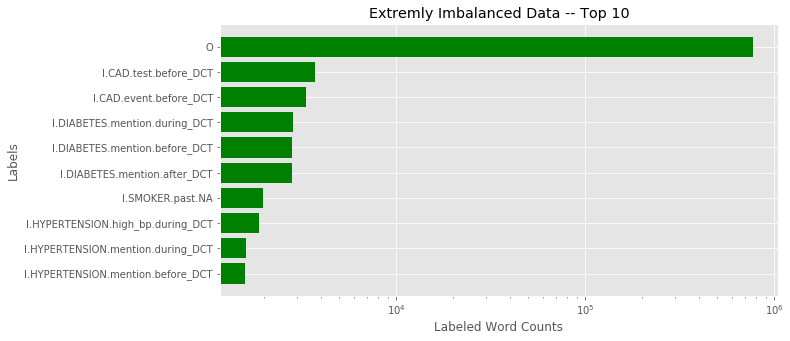

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.barh(x[:10], y[:10], color='green', log=True)
plt.ylabel("Labels")
plt.xlabel("Labeled Word Counts")
plt.title("Extremly Imbalanced Data -- Top 10")
plt.gca().invert_yaxis()
plt.show()

# Up-sampling:
*  ## Concatenate sentences that contains tagged words to the end of the notes for n times

# LSTM (Long Short Term Memory networks)
<br />
<div class="container">
<img src="https://cdn-images-1.medium.com/max/1000/0*mRHhGAbsKaJPbT21.png" style="width: 400px" align="left" />
</div>
<br />
<div class="container">
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" style="width: 600px" align="left" />
</div>
<br />
<div class="container">
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" style="width: 600px" align="left" />
</div>

# LSTM Model Word Sequence Output to Note Output:  (Labels to Gold Labels)
* ### None:
  * 'CAD.event.after_DCT', 'DIABETES.A1C.before_DCT', 'FAMILY_HIST.present.NA', 'HYPERLIPIDEMIA.high_chol.during_DCT'......
* ### All Flattened:
  * 'CAD','event', 'DIABETES', 'A1C', 'before_DCT', 'FAMILY_HIST', 'present', 'NA', 'HYPERLIPIDEMIA', 'high_chol', 'during_DCT'......
* ### Category/Indicator Time Flattened
  * 'CAD.event', 'after_DCT', 'DIABETES.A1C', 'before_DCT', 'FAMILY_HIST.present', 'NA', 'HYPERLIPIDEMIA.high_chol', 'during_DCT'.......

# Training Pipeline (Iteration)
* ### Data Preprocessing
* ### Up-sampling
* ### Embedding Matrix Training
* ### Prepare Input and Output
* ### Train Model
* ### Predict by Trained Model
* ### Model Output Converted to Note Output and Test

# Bayesian Optimization with Gaussian Processes
*  ## Parameters
    * Upsample times
    * Embedding window size
    * Embedding vector dimension size
    * LSTM unit size
    * Dropout rate
    * Convert label to gold label

# Opt Results:
*  {'up': 5, 'window_size': 3, 'embed_size': 5, 'latent_dim': 5, 'dropout_rate': 0.0, 'category': None}
*  F1-score: 0.881

In [17]:
import os
import numpy as np
import time

from gensim.models import Word2Vec
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, hamming_loss, f1_score
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical

from models import get_rnn_model
from cm import multilabel_confusion_matrix, plot_confusion_matrix
from data_process import get_embedding_matrix, data_generator, get_all_notes_labels, get_features, get_targets, get_gold_label_targets

# Customized Evaluation for keras model
class CustomEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = list(validation_data)

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = []
            for x in self.X_val:
                y = np.squeeze(self.model.predict_on_batch(x))
                y_pred.append(y)
            y_pred = np.concatenate(y_pred)
            y_pred_ham = y_pred > 0.5
            y_val = np.concatenate(self.y_val)
            roc = roc_auc_score(y_val, y_pred, average='micro')
            loss = log_loss(y_val, y_pred)
            ham = hamming_loss(y_val, y_pred_ham)
            sub = accuracy_score(y_val, y_pred_ham)
            f1 = f1_score(y_val, y_pred_ham, average='micro')
            print("Adiitional val metrics: - ROC-AUC: %.6f - Log-Loss: %.6f - Hamming-Loss: %.6f - Subset-Accuracy: %.6f - F1-Score: %.6f" % (roc, loss, ham, sub, f1))
            
def model_train(param, 
                notes_train, 
                labels_train, 
                up_notes_train, 
                up_labels_train, 
                gold_labels_train, 
                notes_test, 
                labels_test, 
                gold_labels_test,
                verbose=1):
    
    print('*'*80)
    print("Parameters (note: embed_size*10, latent_dim*64):\n", param)
    print('*'*80)
    
    # assign parameters
    up = int(param['up'])
    window_size = int(param['window_size'])
    embed_size = int(param['embed_size'] * 10)
    latent_dim = int(param['latent_dim'] * 64)
    dropout_rate = param['dropout_rate']
    epochs = param['epochs']
    category = param['category']
    max_features = 60000 #param['max_features']
    train_embed = True #param['train_embed']
    model_type = 'CuDNNLSTM' #param['model_type']
    
    # upsampling
    if up > 0:
        if verbose != 0: print('upsampling for %d times...' % (up))
        notes_train = [note + up * up_note for note, up_note in zip(notes_train, up_notes_train)]
        labels_train = [label + up * up_label for label, up_label in zip(labels_train, up_labels_train)]
    notes = notes_train + notes_test
    labels = labels_train + labels_test
    gold_labels = gold_labels_train + gold_labels_test
    
    # prepare features
    X_train_seq, X_test_seq, word_index = get_features(max_features, notes_train, notes_test, verbose=1)
    nb_words = min(max_features, len(word_index))

    # prepare embedding matrix
    if train_embed:
        if verbose != 0: print('preparing pretrained embedding matrix ...')
        w2v = Word2Vec(notes, size=embed_size, window=window_size, min_count=1, workers=4)
        embedding_index = dict(zip(w2v.wv.index2word, w2v.wv.vectors))
        embedding_matrix = get_embedding_matrix(embedding_index=embedding_index, 
                                                word_index=word_index, 
                                                max_features=max_features, 
                                                embed_size=embed_size)
        
    # prepare targets
    Y_train, Y_test, mlb, num_labels = get_targets(labels_train, labels_test, category, verbose=1)  

    # get rnn model
    model = get_rnn_model(nb_words=nb_words, 
                          num_labels=num_labels, 
                          embed_size=embed_size, 
                          latent_dim=latent_dim, 
                          model_type=model_type, 
                          embedding_matrix=embedding_matrix, 
                          dropout=dropout_rate, 
                          train_embed=train_embed)
    if verbose != 0: 
        print('model summary:')
        print(model.summary())
    
    # model compiling
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # model training
    if verbose != 0: print('\ntraining model ...')
    custevl = CustomEvaluation(validation_data=(X_test_seq, Y_test), interval=1)
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=2, verbose=0, mode='auto')
    train_gen = data_generator(X_train_seq, Y_train)
    test_gen = data_generator(X_test_seq, Y_test)
    v = 1 if verbose != 0 else 0  
    hist = model.fit_generator(train_gen,
                                steps_per_epoch=len(Y_train),
                                epochs=epochs,
                                validation_data=test_gen,
                                validation_steps=len(Y_test),
                                callbacks=[custevl, earlystop],
                                verbose=v)

    # prediction of test data
    if verbose != 0: print('predicting test data ...')
    Y_pred = []
    for x in X_test_seq:
        x = np.array(x).reshape((1,-1))
        y_pred = np.squeeze(model.predict_on_batch(x))
        Y_pred.append(y_pred)
    Y_pred_concat = np.concatenate(Y_pred)
    Y_val = np.concatenate(Y_test)

    # prepare gold label targets
    Y_gold_test, Y_gold_pred, gmlb = get_gold_label_targets(Y_pred, gold_labels, gold_labels_test, mlb, category=category, verbose=1) 

    # f1 scores for gold label
    f1 = f1_score(Y_gold_test, Y_gold_pred, average='micro')
    print('\nF1 Scores for global labels:\nALL (average="micro"):', f1)
    
    # confusion matrix for gold label
    if verbose == 2: 
        gcm = multilabel_confusion_matrix(Y_gold_test, Y_gold_pred)
        f1_all = f1_score(Y_gold_test, Y_gold_pred, average=None)
        for i, j, k in zip(f1_all, gcm, gmlb.classes_):
            t = '%s: F1-Score %5.3f'% (k, i)
            plot_confusion_matrix(j, title=t) 

********************************************************************************
Parameters (note: embed_size*10, latent_dim*64):
 {'up': 5, 'window_size': 3, 'embed_size': 5, 'latent_dim': 5, 'dropout_rate': 0.0, 'epochs': 20, 'category': 'cat_only'}
********************************************************************************
upsampling for 5 times...
preparing features ...
preparing pretrained embedding matrix ...
preparing targets ...
model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 50)          2249200   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 640)         952320    
_________________________________________________________________
spatial_dro

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


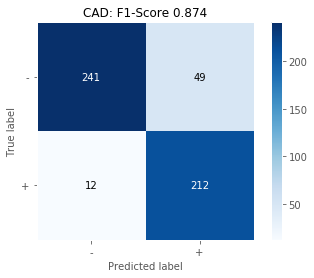

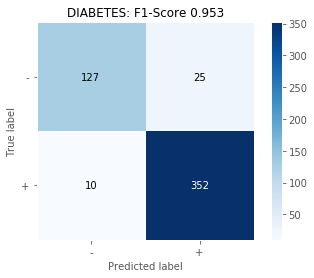

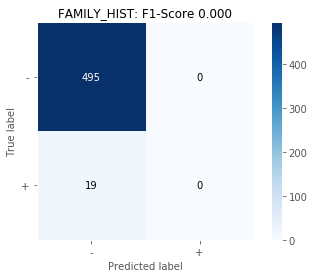

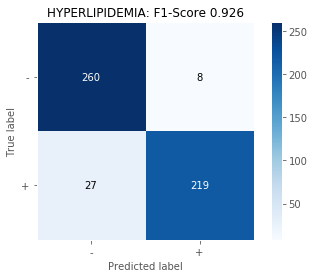

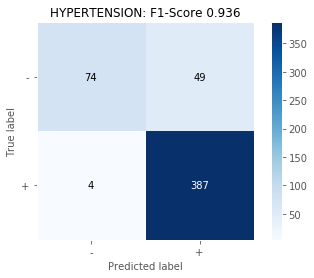

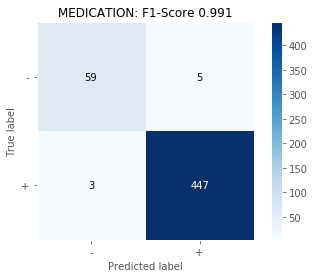

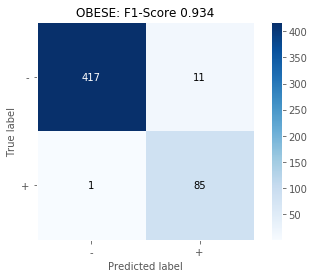

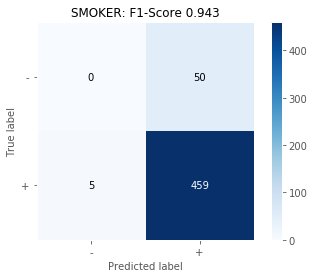

In [18]:
param = {'up': 5, 'window_size': 3, 'embed_size': 5, 'latent_dim': 5, 'dropout_rate': 0.0, 'epochs': 20, 'category': 'cat_only'}

model_train(param, notes_train, labels_train, up_notes_train, up_labels_train, gold_labels_train, notes_test, 
            labels_test, gold_labels_test, verbose=2)

********************************************************************************
Parameters (note: embed_size*10, latent_dim*64):
 {'up': 5, 'window_size': 3, 'embed_size': 5, 'latent_dim': 5, 'dropout_rate': 0.0, 'epochs': 20, 'category': None}
********************************************************************************
upsampling for 5 times...
preparing features ...
preparing pretrained embedding matrix ...
preparing targets ...
model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 50)          2249200   
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 640)         952320    
_________________________________________________________________
spatial_dropout1d

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

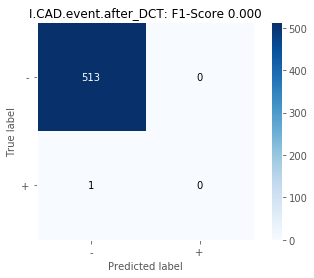

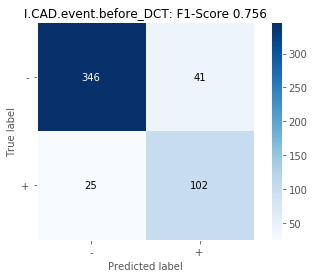

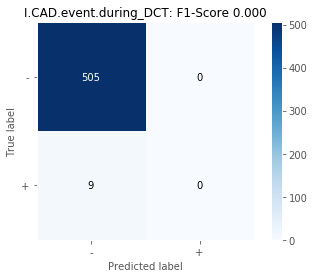

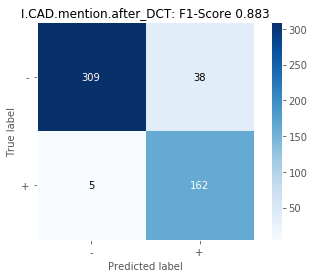

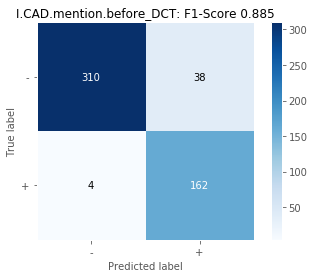

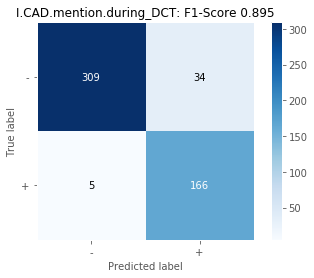

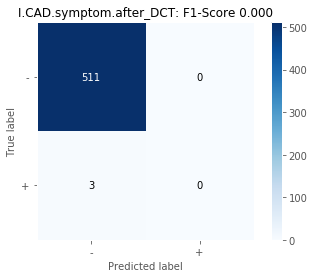

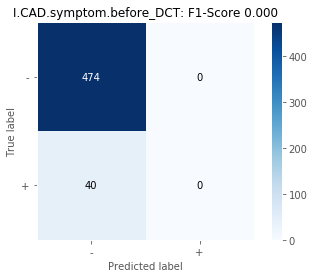

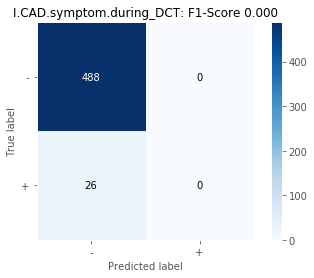

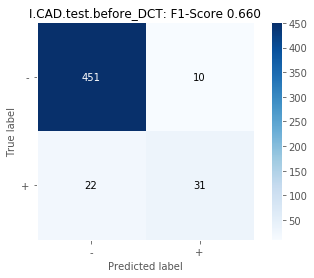

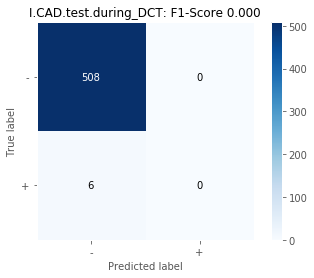

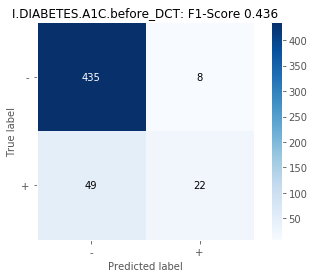

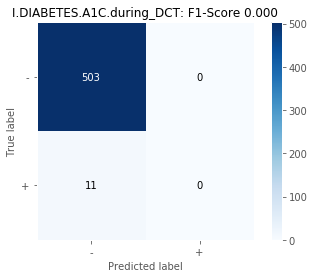

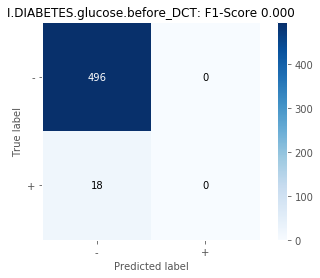

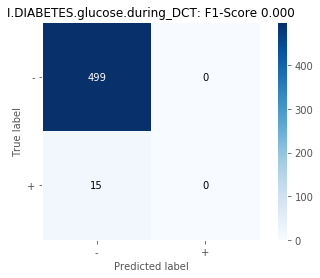

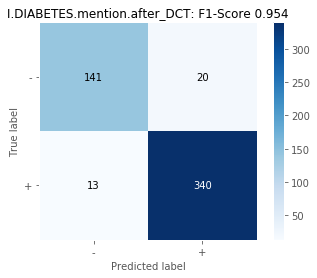

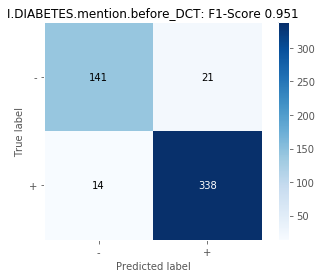

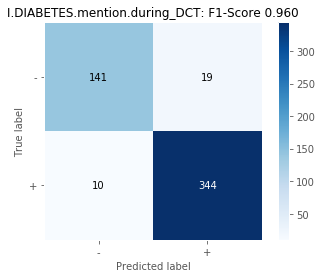

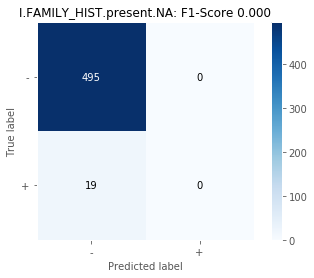

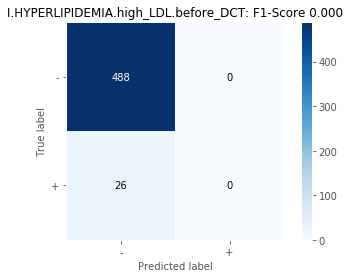

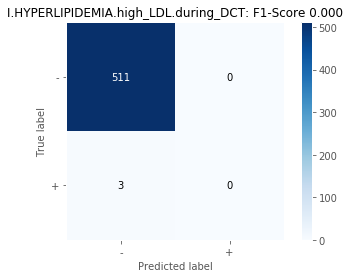

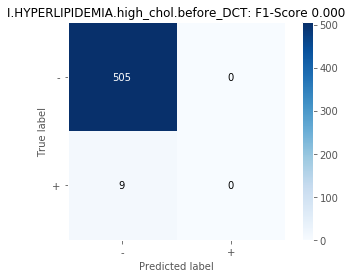

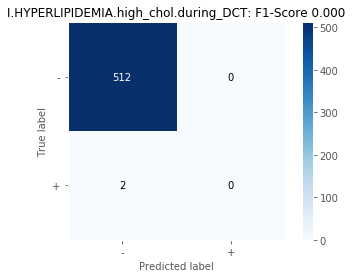

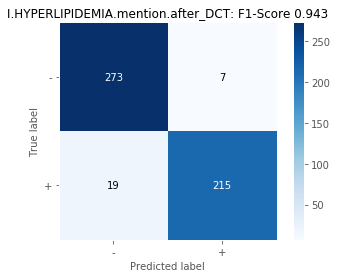

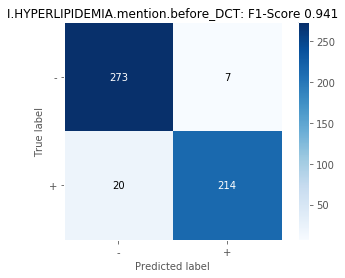

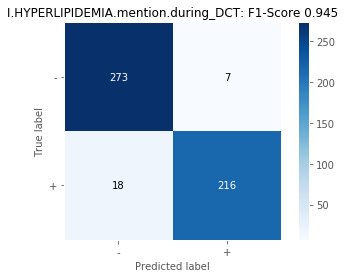

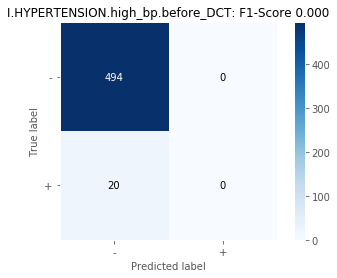

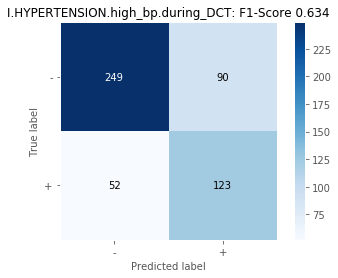

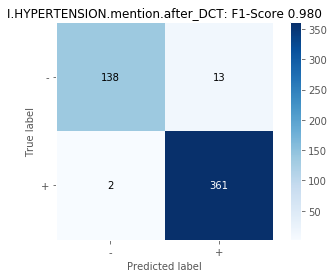

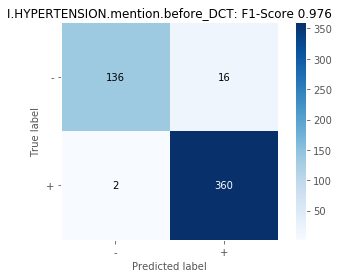

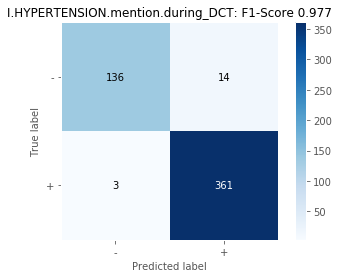

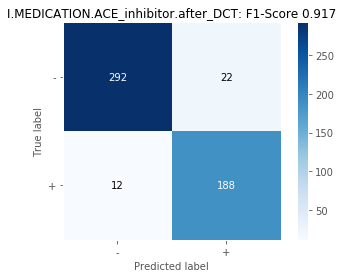

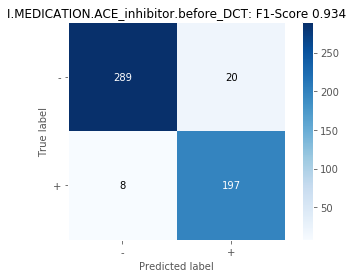

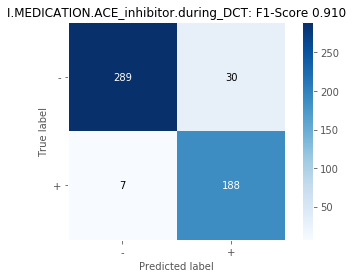

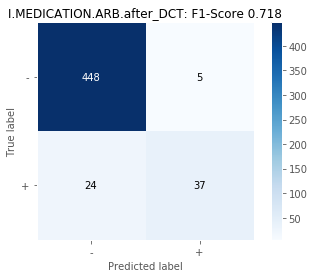

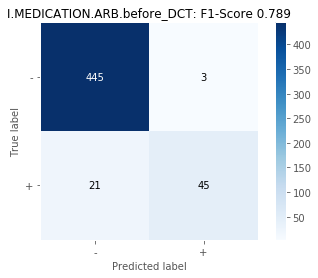

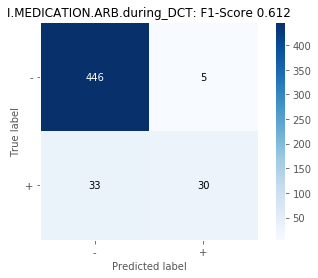

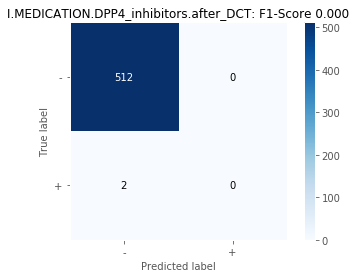

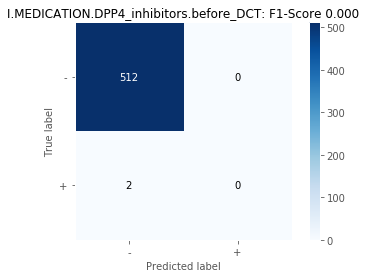

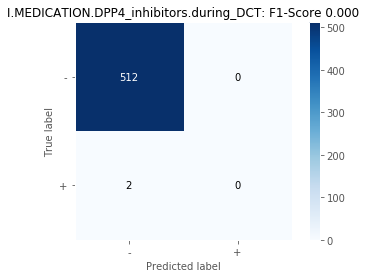

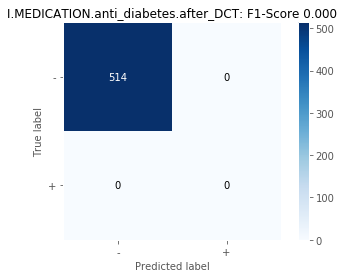

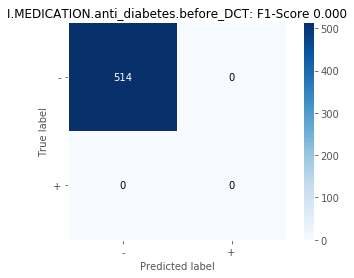

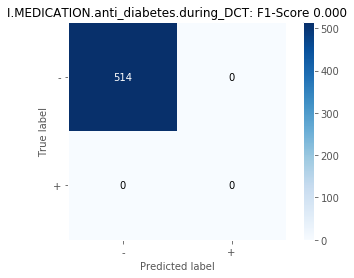

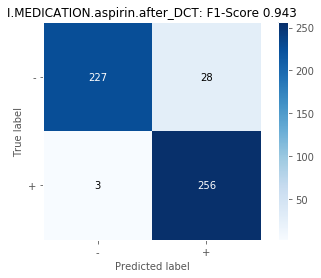

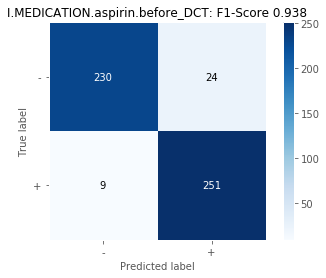

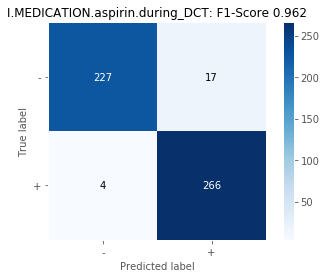

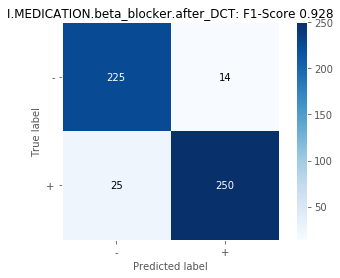

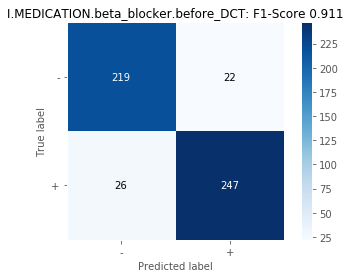

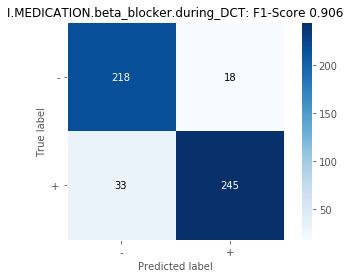

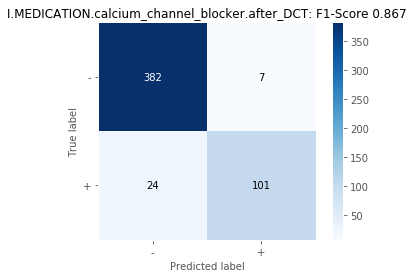

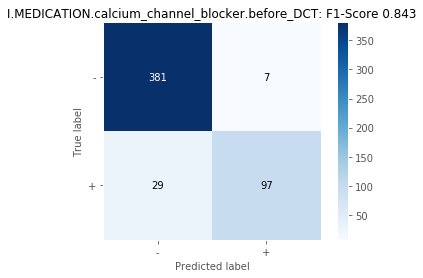

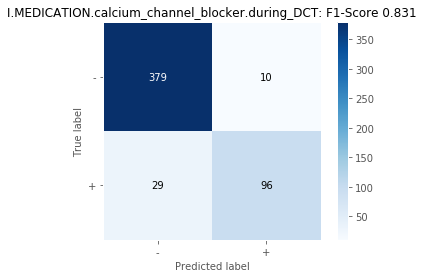

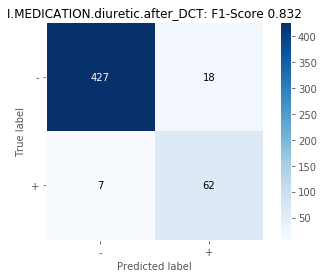

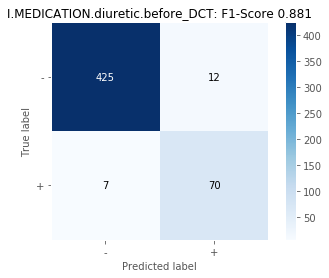

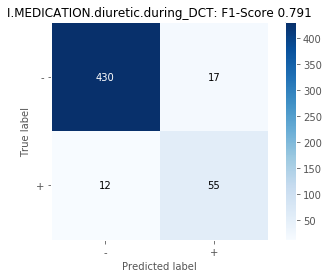

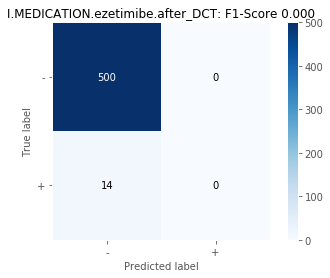

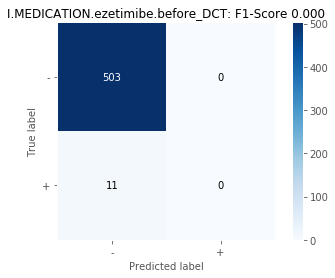

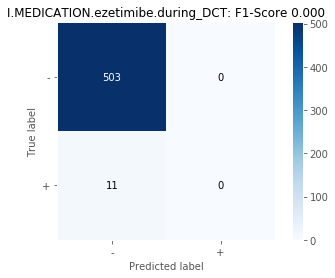

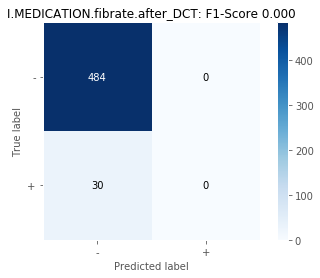

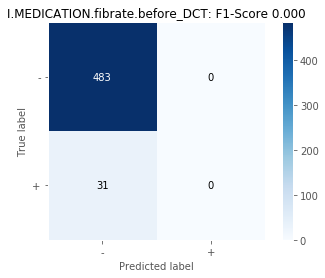

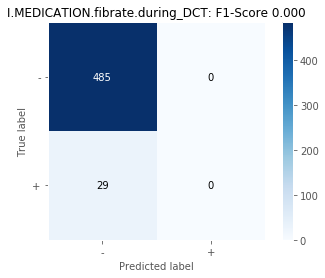

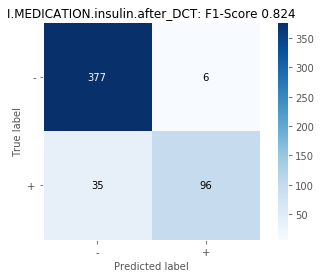

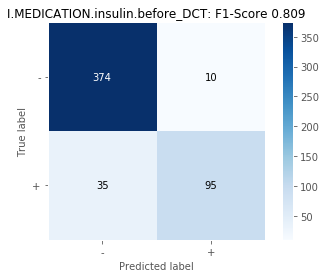

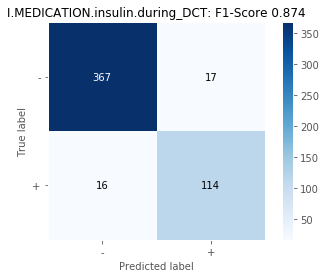

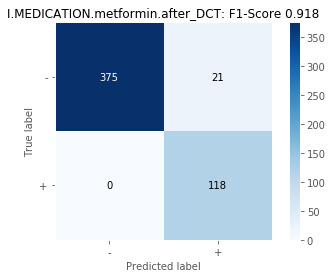

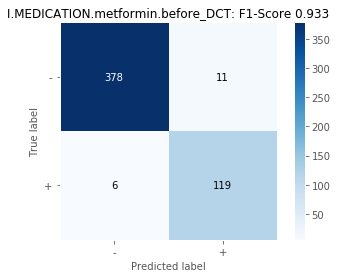

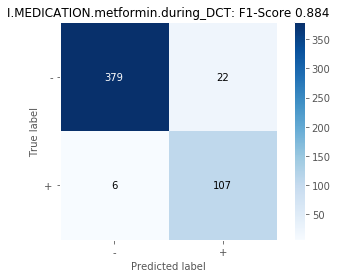

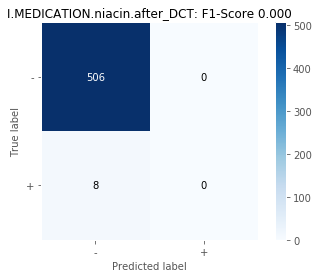

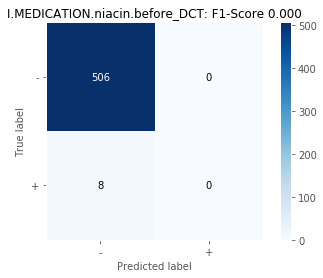

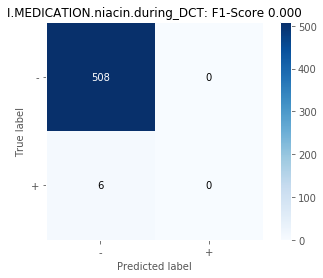

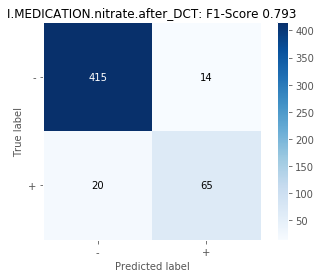

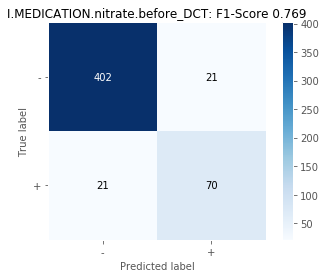

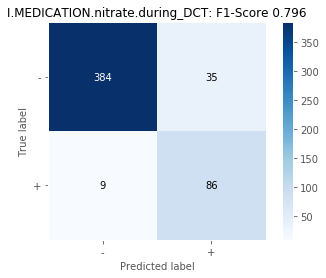

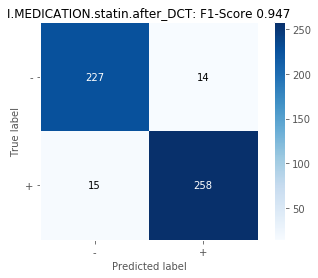

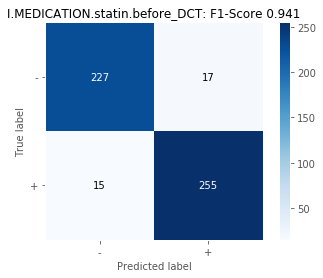

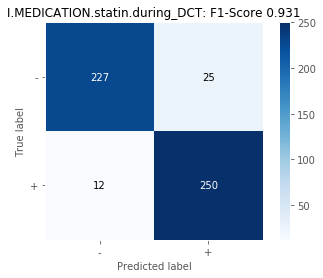

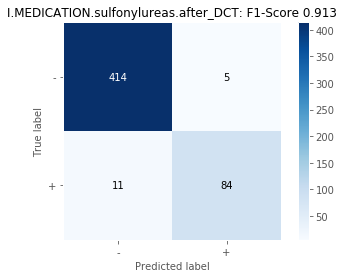

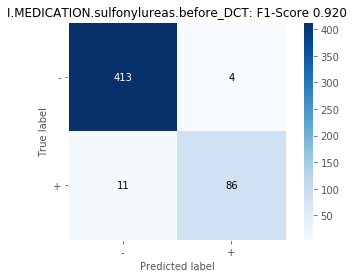

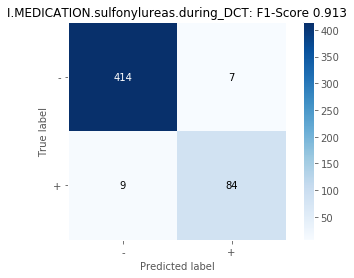

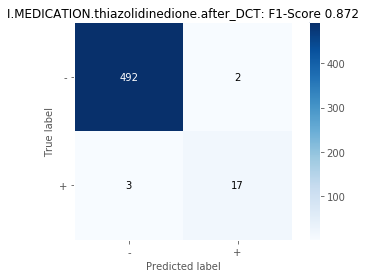

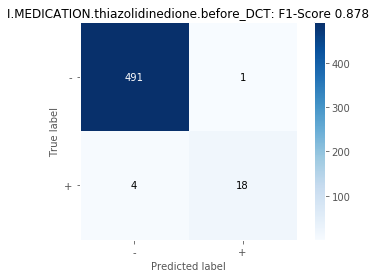

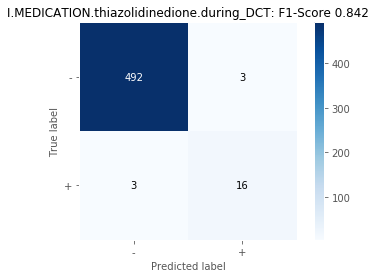

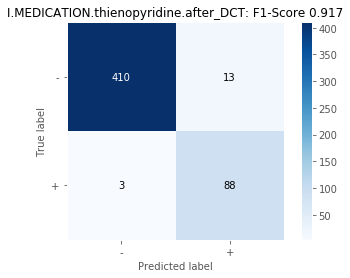

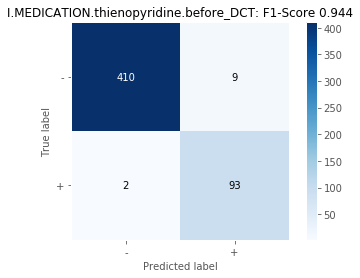

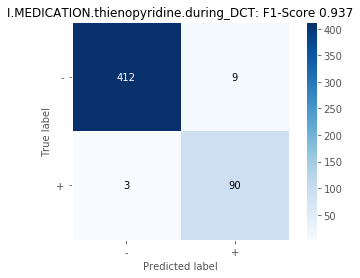

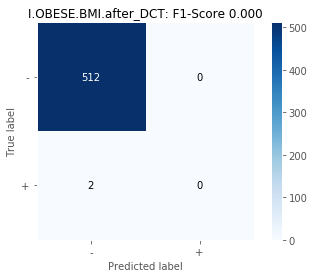

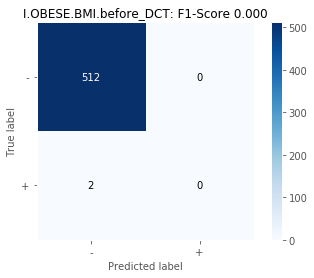

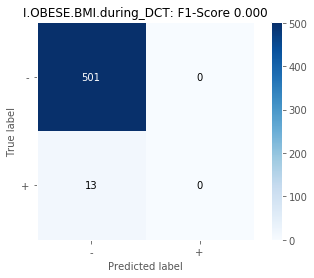

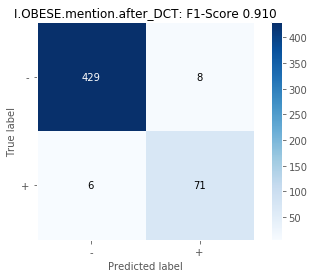

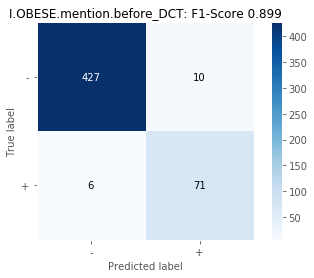

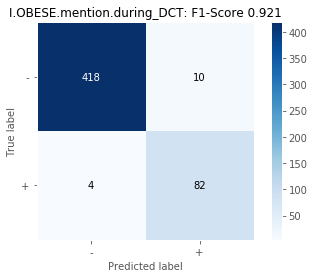

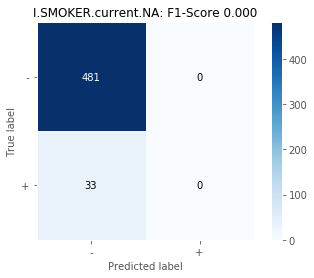

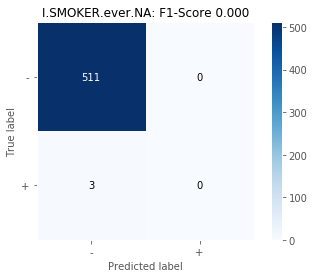

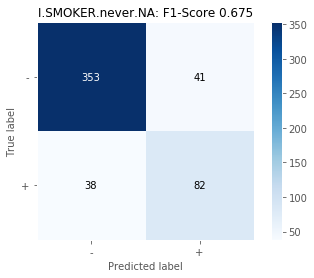

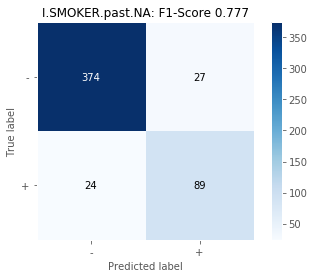

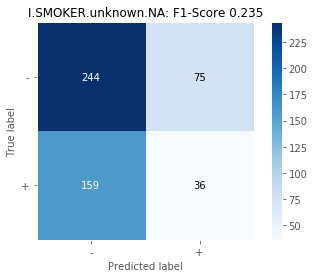

In [19]:
param = {'up': 5, 'window_size': 3, 'embed_size': 5, 'latent_dim': 5, 'dropout_rate': 0.0, 'epochs': 20, 'category': None}

model_train(param, notes_train, labels_train, up_notes_train, up_labels_train, gold_labels_train, notes_test, 
            labels_test, gold_labels_test, verbose=2)